# Getting started with EMIP dataset

In this example, we will show examples of the main functionalities included in the emtk.

This includes:
- Parsing raw data from the EMIP dataset to pandas dataframe.
- Visualizing raw data, filtered fixation, saccades, and AOIs visualization.
- Applying fixation correction through setting offset.
- Generating AOIs for any EMIP stimuli.
- Adding text tokens to generated AOIs.
- Adding srcML tags to AOIs and tokens.
- Performing hit test between fixations and AOIs.

In [1]:
%load_ext autoreload
%autoreload 2

# Importing the tool

In [2]:
from emtk import parsers, visualization, util, aoi

# Parsing raw data from the EMIP dataset

In [3]:
eye_events, samples = parsers.EMIP(sample_size = 7)

parsing file: 100_rawdata.tsv
parsing file: 101_rawdata.tsv
parsing file: 102_rawdata.tsv
parsing file: 103_rawdata.tsv
parsing file: 104_rawdata.tsv
parsing file: 105_rawdata.tsv
parsing file: 106_rawdata.tsv


In [4]:
samples.head()

,eye_tracker,experiment_id,participant_id,filename,trial_id,stimuli_module,stimuli_name,Time,Type,Trial,...,R EPOS Y,R EPOS Z,L GVEC X,L GVEC Y,L GVEC Z,R GVEC X,R GVEC Y,R GVEC Z,Frame,Aux1
0,SMIRed250,100,100,100_rawdata.tsv,0,emtk/datasets/emip_dataset/stimuli,instruction_calibration.jpg,20521593840,SMP,1,...,0.0,0.0,-0.15,0.08,-0.99,0.0,0.0,0.0,-1,NaN
1,SMIRed250,100,100,100_rawdata.tsv,0,emtk/datasets/emip_dataset/stimuli,instruction_calibration.jpg,20521597841,SMP,1,...,0.0,0.0,-0.14,0.08,-0.99,0.0,0.0,0.0,-1,NaN
2,SMIRed250,100,100,100_rawdata.tsv,0,emtk/datasets/emip_dataset/stimuli,instruction_calibration.jpg,20521601842,SMP,1,...,0.0,0.0,-0.15,0.07,-0.99,0.0,0.0,0.0,-1,NaN
3,SMIRed250,100,100,100_rawdata.tsv,0,emtk/datasets/emip_dataset/stimuli,instruction_calibration.jpg,20521605843,SMP,1,...,0.0,0.0,-0.15,0.08,-0.99,0.0,0.0,0.0,-1,NaN
4,SMIRed250,100,100,100_rawdata.tsv,0,emtk/datasets/emip_dataset/stimuli,instruction_calibration.jpg,20521609844,SMP,1,...,0.0,0.0,-0.15,0.08,-0.99,0.0,0.0,0.0,-1,NaN


In [5]:
eye_events.head()

,eye_tracker,experiment_id,participant_id,filename,trial_id,stimuli_module,stimuli_name,timestamp,duration,x0,y0,x1,y1,token,pupil,amplitude,peak_velocity,eye_event_type
0,SMIRed250,100,100,100_rawdata.tsv,0,emtk/datasets/emip_dataset/stimuli,instruction_calibration.jpg,20521737835,144,627.440833,659.305000,NaN,NaN,"[20602727206, MSG, 1, # Message: instruction_c...",0,NaN,NaN,fixation
1,SMIRed250,100,100,100_rawdata.tsv,0,emtk/datasets/emip_dataset/stimuli,instruction_calibration.jpg,20521797815,56,621.782857,653.210714,NaN,NaN,"[20602727206, MSG, 1, # Message: instruction_c...",0,NaN,NaN,fixation
2,SMIRed250,100,100,100_rawdata.tsv,0,emtk/datasets/emip_dataset/stimuli,instruction_calibration.jpg,20521929711,112,665.515000,695.657500,NaN,NaN,"[20602727206, MSG, 1, # Message: instruction_c...",0,NaN,NaN,fixation
3,SMIRed250,100,100,100_rawdata.tsv,0,emtk/datasets/emip_dataset/stimuli,instruction_calibration.jpg,20522125575,112,876.265000,692.520714,NaN,NaN,"[20602727206, MSG, 1, # Message: instruction_c...",0,NaN,NaN,fixation
4,SMIRed250,100,100,100_rawdata.tsv,0,emtk/datasets/emip_dataset/stimuli,instruction_calibration.jpg,20522325667,116,1022.013103,671.194483,NaN,NaN,"[20602727206, MSG, 1, # Message: instruction_c...",0,NaN,NaN,fixation


# Visualization

In [6]:
experiment_id = '106'
trial_id = '2'

## Raw data (samples), filtered fixations, saccades, and aoi

You can visualize any trial raw data, filtered fixations, or a combination of the two. The fixation is yellow, and the samples are red.

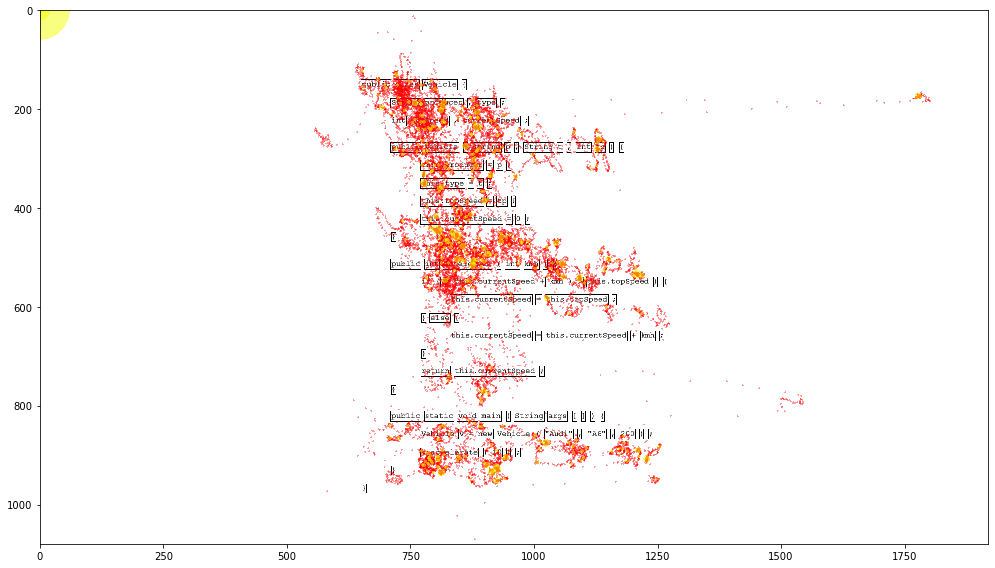

In [7]:
trial_data = eye_events.loc[(eye_events['experiment_id'] == experiment_id) & 
                            (eye_events['trial_id'] == trial_id)]

samples_data = samples.loc[(samples['experiment_id'] == experiment_id) & 
                            (samples['trial_id'] == trial_id)]
 
visualization.draw_trial(trial_data, samples_data, draw_raw_data = True, draw_aoi = True, draw_saccade=True)

## Heatmap - Areas of dense fixation

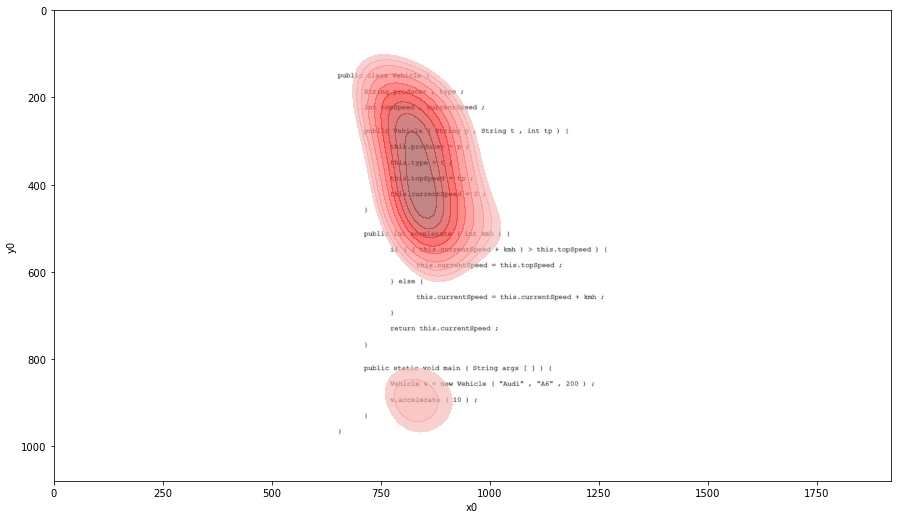

In [8]:
visualization.heatmap(trial_data)

## Duration of fixation on each line

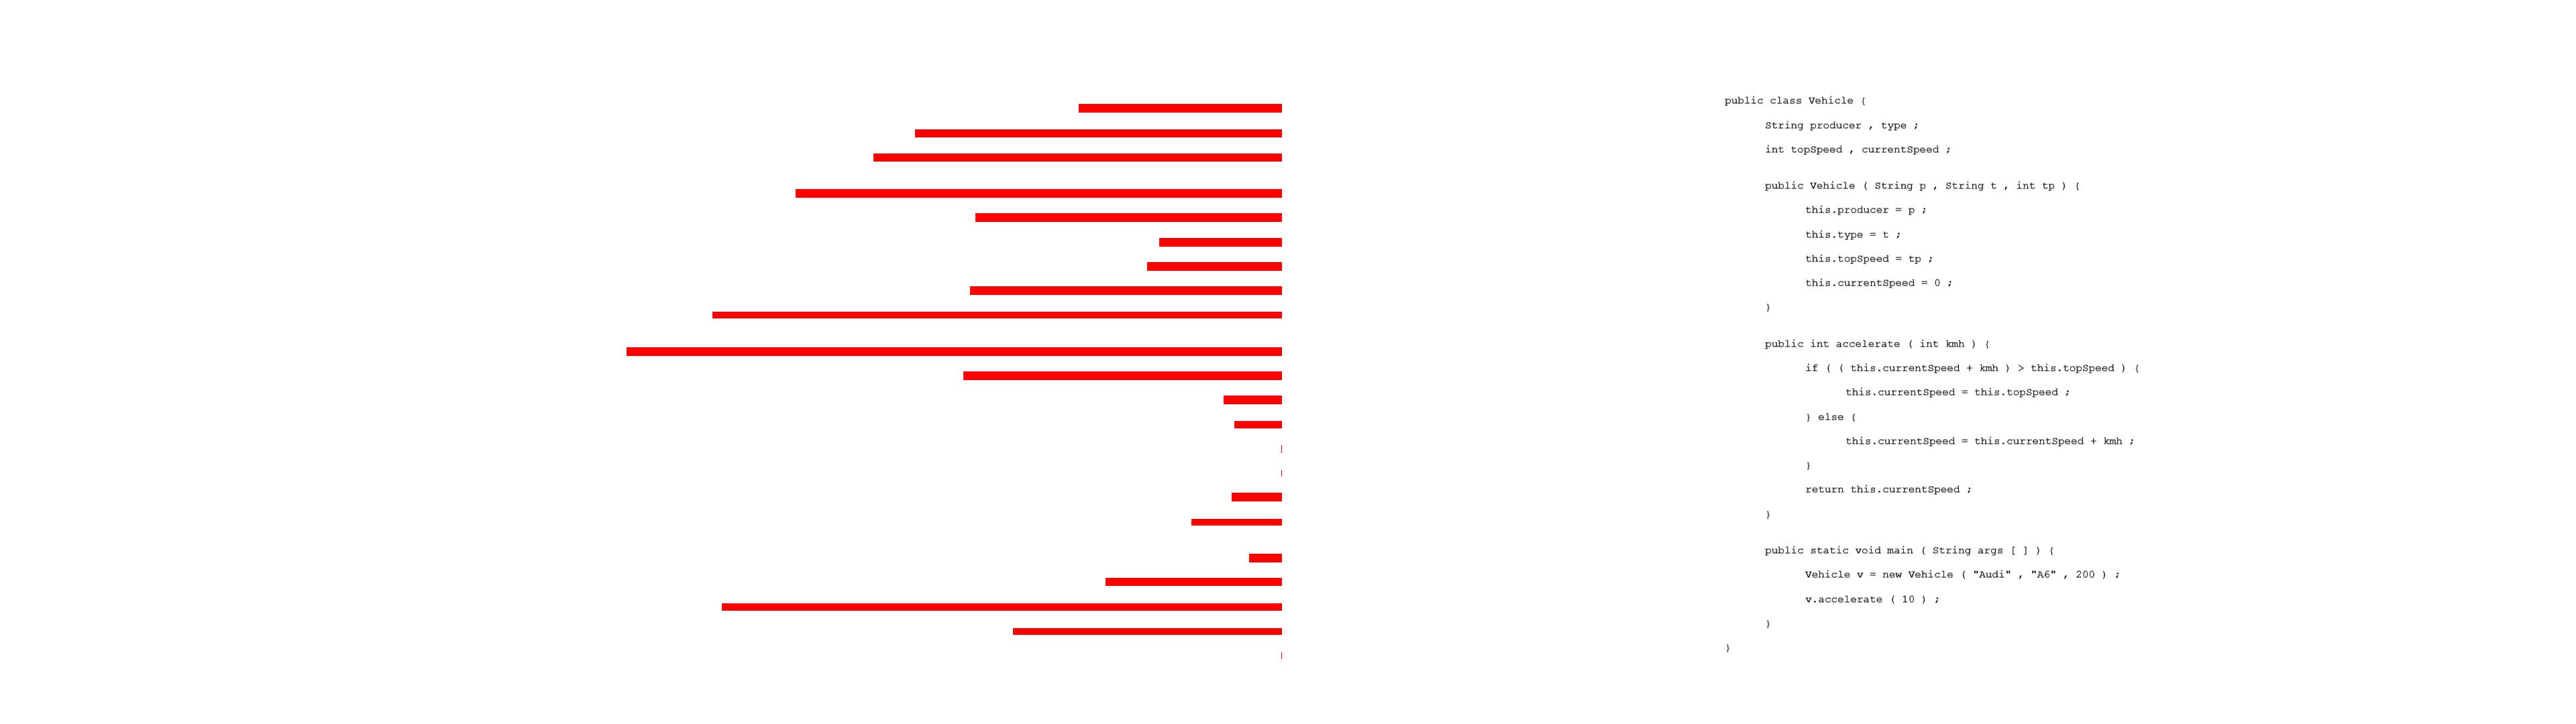

In [9]:
visualization.fixation_duration(trial_data)

## Eye movement across lines through time

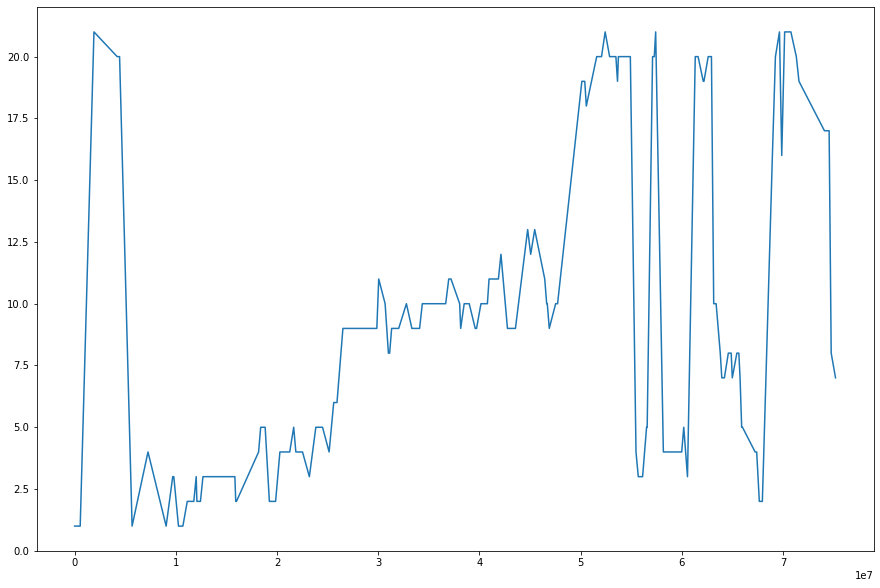

In [10]:
visualization.fixation_timeline(trial_data)

# Fixation correction through setting offset

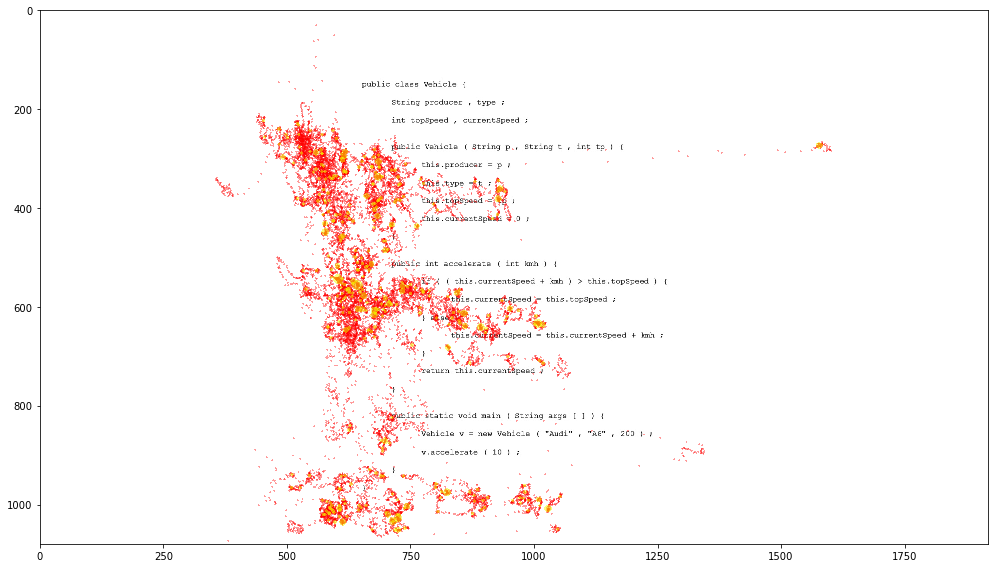

In [11]:
trial_data_copy = util.sample_offset(trial_data, -200, 100)
samples_copy = util.sample_offset(samples_data, -200, 100, x0_col='R POR X [px]', y0_col='R POR Y [px]')
visualization.draw_trial(trial_data_copy, samples_copy, draw_raw_data = True)

# Generate AOIs for a stimuli

You can generate token level or line level AOIs for any stimuli.

In [12]:
aoi_df = aoi.find_aoi(trial_data)
aoi_df.head()

,kind,name,x,y,width,height,image
0,sub-line,line 1 part 1,649.5,140,62,22,vehicle_java2.jpg
1,sub-line,line 1 part 2,716.5,140,52,22,vehicle_java2.jpg
2,sub-line,line 1 part 3,773.5,140,72,22,vehicle_java2.jpg
3,sub-line,line 1 part 4,853.5,140,10,22,vehicle_java2.jpg
4,sub-line,line 2 part 1,709.5,178,62,21,vehicle_java2.jpg


# Add text tokens to generated AOIs

__Prerequisite__: In order to match the tokens with the AOI, make sure in your EMIP dataset folder (under "emtk/datasets/emip_dataset") has the following folder:
```
- emtk
    - datasets
        - emip_dataset
            - EMIP_DataCollection_Materials
                - emip_stimulus_programs
```

In [13]:
file_path = "emtk/datasets/emip_dataset/EMIP_DataCollection_Materials/emip_stimulus_programs/"
aois_with_tokens = aoi.add_tokens_to_AOIs(file_path, aoi_df)
aois_with_tokens.head()

,kind,name,x,y,width,height,image,token
0,sub-line,line 1 part 1,649.5,140,62,22,vehicle_java2.jpg,public
1,sub-line,line 1 part 2,716.5,140,52,22,vehicle_java2.jpg,class
2,sub-line,line 1 part 3,773.5,140,72,22,vehicle_java2.jpg,Vehicle
3,sub-line,line 1 part 4,853.5,140,10,22,vehicle_java2.jpg,{
4,sub-line,line 2 part 1,709.5,178,62,21,vehicle_java2.jpg,String


# Add srcML tags to AOIs with token

__Prerequisite__: In order to match the tokens with the AOI, make sure you have the EMIP2021 folder inside the datasets folder:
```
- emtk
    - datasets
        - EMIP2021
            - rectangle.tsv
            - vehicle.tsv
```

The srcML format is an XML representation for source code, where the markup tags identify elements of the abstract syntax for the language. Read more about it: https://www.srcml.org/about.html

In [14]:
srcML_path = "emtk/datasets/EMIP2021/"
aois_tokens_srcml = aoi.add_srcml_to_AOIs(aois_with_tokens, srcML_path)
aois_tokens_srcml.head()

,kind,name,x,y,width,height,image,token,srcML_tag
0,sub-line,line 1 part 1,649.5,140,62,22,vehicle_java2.jpg,public,class->specifier
1,sub-line,line 1 part 2,716.5,140,52,22,vehicle_java2.jpg,class,class
2,sub-line,line 1 part 3,773.5,140,72,22,vehicle_java2.jpg,Vehicle,class->name
3,sub-line,line 1 part 4,853.5,140,10,22,vehicle_java2.jpg,{,class->block
4,sub-line,line 2 part 1,709.5,178,62,21,vehicle_java2.jpg,String,class->block->decl_stmt->decl->type->name


# Perform hit test between fixation and AOIs

Match fixations to AOIs to calculate the fixation duration over each AOI (can be customized for line or code token). Radius is 25 pixels by default and it represents the area around the AOI included in the AOI region.

In [15]:
trial_data_fixation = trial_data.loc[trial_data['eye_event_type'] == 'fixation']

aoi_fixations = aoi.hit_test(trial_data_fixation, aois_tokens_srcml, radius = 25)
aoi_fixations.head()

,eye_tracker,experiment_id,participant_id,filename,trial_id,stimuli_module,stimuli_name,timestamp,duration,x0,y0,aoi_kind,aoi_name,aoi_x,aoi_y,aoi_width,aoi_height,aoi_token,aoi_srcML_tag
0,SMIRed250,106,106,106_rawdata.tsv,2,emtk/datasets/emip_dataset/stimuli,vehicle_java2.jpg,21889923591,84,683.310000,140.442381,sub-line,line 1 part 1,649.5,140,62,22,public,class->specifier
1,SMIRed250,106,106,106_rawdata.tsv,2,emtk/datasets/emip_dataset/stimuli,vehicle_java2.jpg,21890023606,56,700.760714,157.500714,sub-line,line 1 part 1,649.5,140,62,22,public,class->specifier
2,SMIRed250,106,106,106_rawdata.tsv,2,emtk/datasets/emip_dataset/stimuli,vehicle_java2.jpg,21898966912,64,654.330000,156.318750,sub-line,line 1 part 1,649.5,140,62,22,public,class->specifier
3,SMIRed250,106,106,106_rawdata.tsv,2,emtk/datasets/emip_dataset/stimuli,vehicle_java2.jpg,21900186850,56,697.122857,151.940000,sub-line,line 1 part 1,649.5,140,62,22,public,class->specifier
4,SMIRed250,106,106,106_rawdata.tsv,2,emtk/datasets/emip_dataset/stimuli,vehicle_java2.jpg,21890307895,64,770.528750,151.507500,sub-line,line 1 part 3,773.5,140,72,22,Vehicle,class->name
